# Pump it Up: Data Mining the Water Table
### HOSTED BY DRIVENDATA

https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/


### The features in this dataset  
Your goal is to predict the operating condition of a waterpoint for each record in the dataset. You are provided the following set of information about the waterpoints:

- amount_tsh - Total static head (amount water available to waterpoint)  
- date_recorded - The date the row was entered  
- funder - Who funded the well  
- gps_height - Altitude of the well  
- installer - Organization that installed the well  
- longitude - GPS coordinate  
- latitude - GPS coordinate  
- wpt_name - Name of the waterpoint if there is one  
- num_private -   
- basin - Geographic water basin  
- subvillage - Geographic location  
- region - Geographic location  
- region_code - Geographic location (coded)  
- district_code - Geographic location (coded)  
- lga - Local Government Authority  
- ward - Geographic location  
- population - Population around the well  
- public_meeting - True/False  
- recorded_by - Group entering this row of data  
- scheme_management - Who operates the waterpoint  
- scheme_name - Who operates the waterpoint  
- permit - If the waterpoint is permitted  
- construction_year - Year the waterpoint was constructed  
- extraction_type - The kind of extraction the waterpoint uses  
- extraction_type_group - The kind of extraction the waterpoint uses  
- extraction_type_class - The kind of extraction the waterpoint uses  
- management - How the waterpoint is managed  
- management_group - How the waterpoint is managed  
- payment - What the water costs  
- payment_type - What the water costs  
- water_quality - The quality of the water  
- quality_group - The quality of the water  
- quantity - The quantity of water  
- quantity_group - The quantity of water  
- source - The source of the water  
- source_type - The source of the water  
- source_class - The source of the water  
- waterpoint_type - The kind of waterpoint  
- waterpoint_type_group - The kind of waterpoint  

### Distribution of Labels
The labels in this dataset are simple. There are three possible values:

- functional - the waterpoint is operational and there are no repairs needed  
- functional needs repair - the waterpoint is operational, but needs repairs  
- non functional - the waterpoint is not operational

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Import the data

In [2]:
### The data was pulled from the DrivenData website.
#path = 'https://s3.amazonaws.com/drivendata-prod/data/7/public/'

### Training Set Labels
#y = pd.read_csv(path + '0bf8bc6e-30d0-4c50-956a-603fc693d966.csv')

### Training Set Values
#X = pd.read_csv(path + '4910797b-ee55-40a7-8668-10efd5c1b960.csv')

### Create a dataframe of X/y and generate a local copy
#df = X.merge(y, on = 'id')
#df.to_csv('data/tanzania_water_pump.csv', index = False)

In [3]:
df = pd.read_csv('data/tanzania_water_pump.csv')

## Data Exploration and Visualization

In [4]:

pd.set_option('display.max_columns', None)
# 
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [5]:
# Check the datatypes and null value counts for each of the features.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [6]:
# Generate aggregate statistics.
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [7]:
for col in df.columns:
    print('\t{}: {}'.format(col, len(df[col].value_counts())))

	id: 59400
	amount_tsh: 98
	date_recorded: 356
	funder: 1897
	gps_height: 2428
	installer: 2145
	longitude: 57516
	latitude: 57517
	wpt_name: 37400
	num_private: 65
	basin: 9
	subvillage: 19287
	region: 21
	region_code: 27
	district_code: 20
	lga: 125
	ward: 2092
	population: 1049
	public_meeting: 2
	recorded_by: 1
	scheme_management: 12
	scheme_name: 2696
	permit: 2
	construction_year: 55
	extraction_type: 18
	extraction_type_group: 13
	extraction_type_class: 7
	management: 12
	management_group: 5
	payment: 7
	payment_type: 7
	water_quality: 8
	quality_group: 6
	quantity: 5
	quantity_group: 5
	source: 10
	source_type: 7
	source_class: 3
	waterpoint_type: 7
	waterpoint_type_group: 6
	status_group: 3


# Clean the data

In [8]:
# amount_tsh - Total static head (amount water available to waterpoint)
df.amount_tsh.value_counts()

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
8500.0          1
6300.0          1
220.0           1
138000.0        1
12.0            1
Name: amount_tsh, Length: 98, dtype: int64

In [9]:
# date_recorded - The date the row was entered
df['date_recorded'] = pd.to_datetime(df['date_recorded'])
df.date_recorded.value_counts()

2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
             ... 
2004-06-01      1
2011-09-08      1
2011-09-16      1
2011-09-13      1
2011-09-18      1
Name: date_recorded, Length: 356, dtype: int64

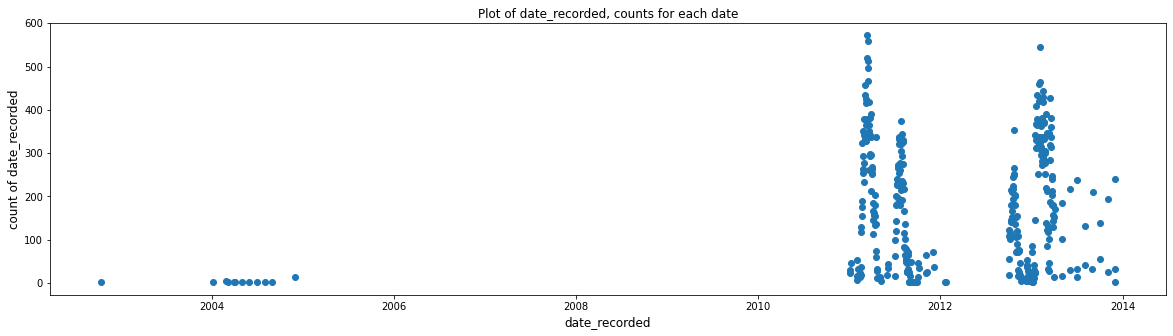

In [10]:
dates = df['date_recorded'].value_counts()
plt.figure(figsize=(20,5))

plt.title('Plot of date_recorded, counts for each date')
plt.ylabel('count of date_recorded', fontsize=12)
plt.xlabel('date_recorded', fontsize=12)
plt.plot_date(dates.index, dates.values)
plt.show()

dates = df['date_recorded'].value_counts()
plt.figure(figsize=(40,5))

plt.title('Plot of date_recorded, counts for each date')
plt.ylabel('count of date_recorded', fontsize=12)
plt.xlabel('date_recorded', fontsize=12)
date_plot = sns.barplot(dates.index, dates.values)
date_plot.set_xticklabels(date_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [11]:
# funder - Who funded the well 
df.funder.value_counts()

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Cristan Outrich              1
Salim Ahmed Salim            1
Saudia                       1
Msigwa                       1
Sipdo                        1
Name: funder, Length: 1897, dtype: int64

In [12]:
# gps_height - Altitude of the well
df.gps_height.value_counts()

 0       20438
-15         60
-16         55
-13         55
-20         52
         ...  
 2285        1
 2424        1
 2552        1
 2413        1
 2385        1
Name: gps_height, Length: 2428, dtype: int64

In [13]:
# installer - Organization that installed the well
df.installer.value_counts()

DWE               17402
Government         1825
RWE                1206
Commu              1060
DANIDA             1050
                  ...  
BAPTIST CHURCH        1
MSIKITI               1
Msuba                 1
Mwl.Mwita             1
Cida                  1
Name: installer, Length: 2145, dtype: int64

In [14]:
# longitude - GPS coordinate  
# latitude - GPS coordinate  

In [15]:
# wpt_name - Name of the waterpoint if there is one
df.wpt_name.value_counts()

none                        3563
Shuleni                     1748
Zahanati                     830
Msikitini                    535
Kanisani                     323
                            ... 
Msikiti Wa Madina              1
Bushitala Primary School       1
Kwa Anod                       1
Juma Omary                     1
Kwakimasha                     1
Name: wpt_name, Length: 37400, dtype: int64

In [16]:
# num_private -   
df.num_private.value_counts()

0      58643
6         81
1         73
5         46
8         46
       ...  
180        1
213        1
23         1
55         1
94         1
Name: num_private, Length: 65, dtype: int64

In [17]:
# basin - Geographic water basin
df.basin.value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

In [18]:
# subvillage - Geographic location
df.subvillage.value_counts()

Madukani       508
Shuleni        506
Majengo        502
Kati           373
Mtakuja        262
              ... 
Mugorogoro       1
Kankundane       1
Bulende          1
Kalimasumni      1
Rushe A          1
Name: subvillage, Length: 19287, dtype: int64

In [19]:
# region - Geographic location
df.region.value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [20]:
# region_code - Geographic location (coded)
df.region_code.value_counts()

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

In [21]:
# district_code - Geographic location (coded)
df.district_code.value_counts()

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

In [22]:
# lga - Geographic location
df.lga.value_counts()

Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: lga, Length: 125, dtype: int64

In [23]:
# ward - Geographic location
df.ward.value_counts()

Igosi            307
Imalinyi         252
Siha Kati        232
Mdandu           231
Nduruma          217
                ... 
Kihangimahuka      1
Ikweha             1
Kirongo            1
Korongoni          1
Burungura          1
Name: ward, Length: 2092, dtype: int64

In [24]:
# population - Population around the well
df.population.value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

In [25]:
population = df.groupby('date_recorded', as_index = False).agg({"population": "sum"})
population.head()

,date_recorded,population
0,2002-10-14,0
1,2004-01-07,65
2,2004-03-01,1418
3,2004-03-06,713
4,2004-04-01,1


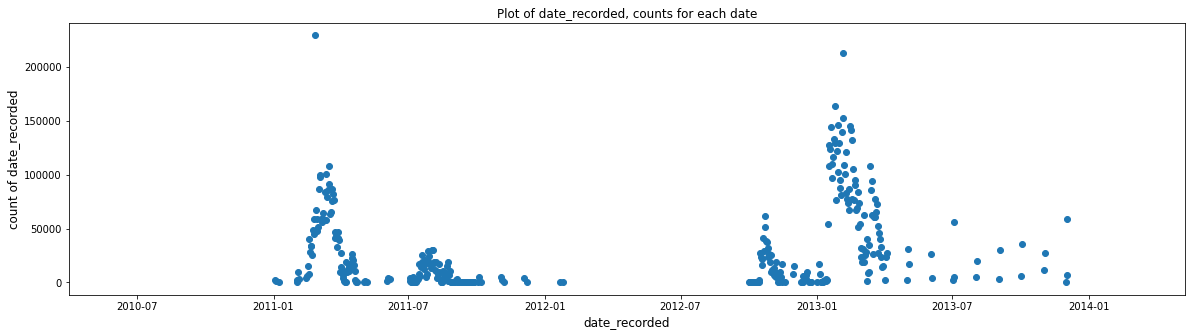

In [26]:
plt.figure(figsize=(20,5))
plt.title('Plot of date_recorded, counts for each date')
plt.ylabel('count of date_recorded', fontsize=12)
plt.xlabel('date_recorded', fontsize=12)
plt.xlim(14700, 16200)
plt.plot_date(population.date_recorded, population.population)
plt.show()

In [27]:
# public_meeting - True/False
df.public_meeting.value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [28]:
# recorded_by - Group entering this row of data
df.recorded_by.value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

In [29]:
# scheme_management - Who operates the waterpoint
df.scheme_management.value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [30]:
# scheme_name - Who operates the waterpoint
df.scheme_name.value_counts()

K                              682
None                           644
Borehole                       546
Chalinze wate                  405
M                              400
                              ... 
Marine Park /Village             1
Longuo water supply              1
Tove mtwango water supply s      1
Kurui water Supply               1
BL Bonifas Kingu                 1
Name: scheme_name, Length: 2696, dtype: int64

In [31]:
# permit - If the waterpoint is permitted
df.permit.value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [32]:
# construction_year - Year the waterpoint was constructed
df.construction_year.value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [33]:
# extraction_type - The kind of extraction the waterpoint uses
df.extraction_type.value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [34]:
# extraction_type_group - The kind of extraction the waterpoint uses
df.extraction_type_group.value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [35]:
# extraction_type_class - The kind of extraction the waterpoint uses
df.extraction_type_class.value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [36]:
# management - How the waterpoint is managed
df.management.value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [37]:
# management_group - How the waterpoint is managed
df.management_group.value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [38]:
# payment - What the water costs  
df.payment.value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [39]:
# payment_type - What the water costs  
df.payment_type.value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [40]:
# water_quality - The quality of the water  
df.water_quality.value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [41]:
# quality_group - The quality of the water  
df.quality_group.value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [42]:
# quantity - The quantity of water
df.quantity.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [43]:
# quantity_group - The quantity of water
df.quantity_group.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [44]:
# source - The source of the water
df.source.value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [45]:
# source_type - The source of the water
df.source_type.value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [46]:
# source_class - The source of the water
df.source_class.value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [47]:
# waterpoint_type - The kind of waterpoint
df.waterpoint_type.value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [48]:
# waterpoint_type_group - The kind of waterpoint
df.waterpoint_type_group.value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

### Keep/Drop
amount_tsh - keep  
<font color='red'>date_recorded - doesn't correlate to anything</font>  
<font color='red'>funder - this column appears to have a lot of errors</font>  
gps_height - keep  
<font color='red'>installer - this column appears to have a lot of errors</font>  
<font color='red'>latitude - store in separate dataframe</font>  
<font color='red'>longitude - store in separate dataframe</font>  
<font color='red'>wpt_name - arbitrary</font>  
<font color='red'>num_private - unknown field</font>  
basin - keep (9 basins total)  
<font color='red'>subvillage - determine importance</font>  
<font color='red'>region - determine importance (21 regions total)</font>  
<font color='red'>region_code - duplicate of region (integer for region)</font>  
<font color='red'>district_code - determine importance</font>  
lga - keep  
<font color='red'>ward - determine importance</font>  
<font color='red'>population - 21,381 values are '0'</font>  
public_meeting - keep (determine importance)  
<font color='red'>recorded_by - all values are GEODATA Consultants Ltd</font>  
<font color='red'>scheme_management - not as detailed as extraction_type</font>  
<font color='red'>scheme_name - this column appears to have a lot of errors</font>  
permit - keep  
<font color='red'>construction_year - 20,709 rows due to '0' value???</font>  
extraction_type - keep  
<font color='red'>extraction_type_group - not as detailed as extraction_type</font>  
<font color='red'>extraction_type_class - not as detailed as extraction_type</font>  
management - keep  
<font color='red'>management_group - not as detailed as management</font>  
payment - keep  
<font color='red'>payment_type - duplicate of payment</font>  
water_quality - keep  
<font color='red'>quality_group - not as detailed as water_quality</font>  
quantity - keep  
<font color='red'>quantity_group - duplicate of quantity</font>  
source - keep  
<font color='red'>source_type - not as detailed as source</font>  
<font color='red'>source_class - larger grouping for source</font>  
waterpoint_type - keep  
<font color='red'>waterpoint_type_group - not as detailed as waterpoint_type</font>  

In [49]:
df = df[(df.latitude != 0) & (df.longitude != 0)]

# create a column that combines 'region' and 'district_code'
# df['location'] = df.region + df.district_code.astype(str)

df_location = df[['latitude', 'longitude']]
df_3d = df[['latitude', 'longitude', 'gps_height', 'status_group']]
df.drop(columns = ['id', 'funder', 'installer', 'latitude', 'longitude', 'wpt_name', 'num_private', 'subvillage', 'region', 
                   'region_code', 'district_code', 'ward', 'population', 'recorded_by', 'scheme_management', 'scheme_name', 
                   'construction_year', 'extraction_type_group', 'extraction_type_class', 'management_group', 'payment_type', 
                   'quality_group', 'quantity_group', 'source_type', 'source_class', 'waterpoint_type_group'], inplace = True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57588 entries, 0 to 59399
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   amount_tsh       57588 non-null  float64       
 1   date_recorded    57588 non-null  datetime64[ns]
 2   gps_height       57588 non-null  int64         
 3   basin            57588 non-null  object        
 4   lga              57588 non-null  object        
 5   public_meeting   54612 non-null  object        
 6   permit           54532 non-null  object        
 7   extraction_type  57588 non-null  object        
 8   management       57588 non-null  object        
 9   payment          57588 non-null  object        
 10  water_quality    57588 non-null  object        
 11  quantity         57588 non-null  object        
 12  source           57588 non-null  object        
 13  waterpoint_type  57588 non-null  object        
 14  status_group     57588 non-null  objec

### Use Dummy Variables for Categorical Variables

In [51]:
# Create new columns to simplify categorical variables

# status_group: 1 is 'functional', 2 is 'functional needs repair', 3 is 'non functional'
df['status'] = np.where(df.status_group == 'functional', 1, 
                        (np.where(df.status_group == 'functional needs repair', 2, 3)))

# date_recorded: 1 is before 6/1/11, 2 is 6/1/11 to 1/1/12, 3 is 1/1/12 to 1/1/13, 4 is 1/1/13 to 3/10/13, 5 is after 3/10/13
df['record_date'] = np.where(df.date_recorded < '2011-06-01', 1, 
                        (np.where((df.date_recorded >= '2011-06-01') & (df.date_recorded < '2012-01-01'), 2, 
                        (np.where((df.date_recorded >= '2012-01-01') & (df.date_recorded < '2013-01-01'), 3, 
                        (np.where((df.date_recorded >= '2013-01-01') & (df.date_recorded < '2013-03-10'), 4, 5)))))))

# amount_tsh: 0 - (0, ~42k values),  1 - (1-250, ~9k values), 2 - (251+ ~9k values)
df['total_head'] = np.where(df.amount_tsh == 0, 0, (np.where((df.amount_tsh > 0) & (df.amount_tsh < 251), 1, 2)))

# gps_height: 


# population:


# public_meeting:
df['known_meeting'] = np.where(df.public_meeting == True, 1, 0)

# permit: 1 is 'true', 0 is 'false' or 'null'
df['known_permit'] = np.where(df.permit == True, 1, 0)

# payment


# quantity: 0 is 'dry'/'seasonal'/'unknown' (assuming ‘seasonal’ means it’s only sufficient during the wet season), 1 is ‘insufficient’, and 2 is ‘enough’
df['water_amt'] = np.where(df.quantity == 'enough', 2, (np.where(df.quantity == 'insufficient', 1, 0)))


# water_quality: 1 is ‘soft’, 0 is ‘other’
df['water'] = np.where(df.water_quality == 'soft', 1, 0)

df.drop(columns = (['status_group', 'date_recorded', 'amount_tsh', 'public_meeting', 'permit', 'quantity', 'water_quality']), inplace = True)

In [52]:
df.head()

,gps_height,basin,lga,extraction_type,management,payment,source,waterpoint_type,status,record_date,total_head,known_meeting,known_permit,water_amt,water
0,1390,Lake Nyasa,Ludewa,gravity,vwc,pay annually,spring,communal standpipe,1,1,2,1,0,2,1
1,1399,Lake Victoria,Serengeti,gravity,wug,never pay,rainwater harvesting,communal standpipe,1,4,0,0,1,1,1
2,686,Pangani,Simanjiro,gravity,vwc,pay per bucket,dam,communal standpipe multiple,1,4,1,1,1,2,1
3,263,Ruvuma / Southern Coast,Nanyumbu,submersible,vwc,never pay,machine dbh,communal standpipe multiple,3,4,0,1,1,0,1
4,0,Lake Victoria,Karagwe,gravity,other,never pay,rainwater harvesting,communal standpipe,1,2,0,1,1,0,1


In [53]:
df.gps_height.value_counts(bins = 50, sort = False)

(-92.861, -32.8]      249
(-32.8, 24.4]       20580
(24.4, 81.6]         1336
(81.6, 138.8]         835
(138.8, 196.0]        729
(196.0, 253.2]        818
(253.2, 310.4]       1706
(310.4, 367.6]       1606
(367.6, 424.8]        911
(424.8, 482.0]        896
(482.0, 539.2]        597
(539.2, 596.4]        361
(596.4, 653.6]        277
(653.6, 710.8]        513
(710.8, 768.0]        553
(768.0, 825.2]        599
(825.2, 882.4]        684
(882.4, 939.6]        686
(939.6, 996.8]       1072
(996.8, 1054.0]      1037
(1054.0, 1111.2]      949
(1111.2, 1168.4]     1161
(1168.4, 1225.6]     1515
(1225.6, 1282.8]     1735
(1282.8, 1340.0]     2038
(1340.0, 1397.2]     1761
(1397.2, 1454.4]     1477
(1454.4, 1511.6]     1535
(1511.6, 1568.8]     1546
(1568.8, 1626.0]     1606
(1626.0, 1683.2]     1275
(1683.2, 1740.4]     1056
(1740.4, 1797.6]      929
(1797.6, 1854.8]      629
(1854.8, 1912.0]      479
(1912.0, 1969.2]      420
(1969.2, 2026.4]      329
(2026.4, 2083.6]      210
(2083.6, 214

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57588 entries, 0 to 59399
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gps_height       57588 non-null  int64 
 1   basin            57588 non-null  object
 2   lga              57588 non-null  object
 3   extraction_type  57588 non-null  object
 4   management       57588 non-null  object
 5   payment          57588 non-null  object
 6   source           57588 non-null  object
 7   waterpoint_type  57588 non-null  object
 8   status           57588 non-null  int64 
 9   record_date      57588 non-null  int64 
 10  total_head       57588 non-null  int64 
 11  known_meeting    57588 non-null  int64 
 12  known_permit     57588 non-null  int64 
 13  water_amt        57588 non-null  int64 
 14  water            57588 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 7.0+ MB


In [55]:
func = df_3d[df_3d['status_group'] == 'functional']
non_func = df_3d[df_3d['status_group'] == 'non functional']
repair = df_3d[df_3d['status_group'] == 'functional needs repair']

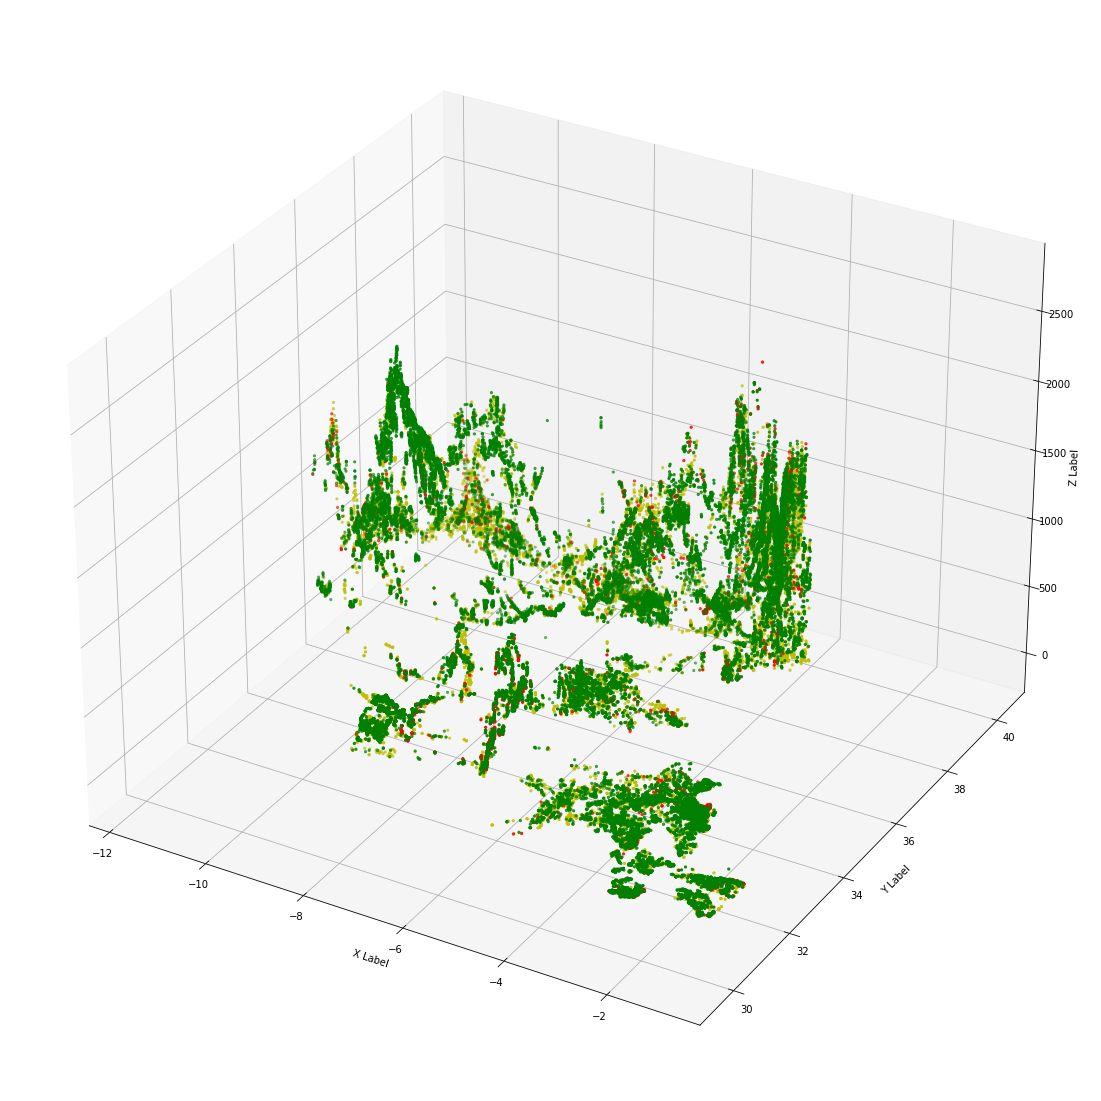

In [56]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(func.latitude, func.longitude, func.gps_height, c='g', marker='.')
ax.scatter(non_func.latitude, non_func.longitude, non_func.gps_height, c='y', marker='.')
ax.scatter(repair.latitude, repair.longitude, repair.gps_height, c='r', marker='.')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [57]:
df.drop(columns = (['gps_height']), inplace = True)

In [58]:
df.columns

Index(['basin', 'lga', 'extraction_type', 'management', 'payment', 'source',
       'waterpoint_type', 'status', 'record_date', 'total_head',
       'known_meeting', 'known_permit', 'water_amt', 'water'],
      dtype='object')

## Prepare the data for the Model

#### One-Hot Encoding of Dummy Variables

In [59]:
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20
    
cat_encoder = OneHotEncoder()

In [60]:
df.head()

,basin,lga,extraction_type,management,payment,source,waterpoint_type,status,record_date,total_head,known_meeting,known_permit,water_amt,water
0,Lake Nyasa,Ludewa,gravity,vwc,pay annually,spring,communal standpipe,1,1,2,1,0,2,1
1,Lake Victoria,Serengeti,gravity,wug,never pay,rainwater harvesting,communal standpipe,1,4,0,0,1,1,1
2,Pangani,Simanjiro,gravity,vwc,pay per bucket,dam,communal standpipe multiple,1,4,1,1,1,2,1
3,Ruvuma / Southern Coast,Nanyumbu,submersible,vwc,never pay,machine dbh,communal standpipe multiple,3,4,0,1,1,0,1
4,Lake Victoria,Karagwe,gravity,other,never pay,rainwater harvesting,communal standpipe,1,2,0,1,1,0,1


In [61]:
df_onehot = df.drop(columns = ['status', 'record_date', 'total_head', 'known_meeting', 'known_permit', 'water_amt', 'water'], axis=1)
df_cat = df.drop(columns = ['status', 'basin', 'lga', 'extraction_type', 'management', 'payment', 'source', 'waterpoint_type'], axis=1)

In [62]:
basin = df_onehot[['basin']]
basin_1hot = cat_encoder.fit_transform(basin)
basin_cats = cat_encoder.categories_[0].tolist()

lga = df_onehot[['lga']]
lga_1hot = cat_encoder.fit_transform(lga)
lga_cats = cat_encoder.categories_[0].tolist()

extraction_type = df_onehot[['extraction_type']]
extraction_type_1hot = cat_encoder.fit_transform(extraction_type)
extraction_type_cats = cat_encoder.categories_[0].tolist()

management = df_onehot[['management']]
management_1hot = cat_encoder.fit_transform(management)
management_cats = cat_encoder.categories_[0].tolist()

payment = df_onehot[['payment']]
payment_1hot = cat_encoder.fit_transform(payment)
payment_cats = cat_encoder.categories_[0].tolist()

source = df_onehot[['source']]
source_1hot = cat_encoder.fit_transform(source)
source_cats = cat_encoder.categories_[0].tolist()

waterpoint_type = df_onehot[['waterpoint_type']]
waterpoint_type_1hot = cat_encoder.fit_transform(waterpoint_type)
waterpoint_type_cats = cat_encoder.categories_[0].tolist()

In [63]:
#  
array_cat = np.c_[(df_cat, basin_1hot.toarray(), lga_1hot.toarray(), extraction_type_1hot.toarray(), management_1hot.toarray(), 
               payment_1hot.toarray(), source_1hot.toarray(), waterpoint_type_1hot.toarray())]

In [64]:
# making a list of columns
cols = df_cat.columns.tolist() + basin_cats + lga_cats + extraction_type_cats + management_cats + payment_cats + source_cats + waterpoint_type_cats

In [65]:
df_targ = df['status'].copy()

In [66]:
df = pd.DataFrame(array_cat, columns = cols, index = df_onehot.index)

In [67]:
df = pd.concat([df_targ, df], axis=1)

In [68]:
df.head()

,status,record_date,total_head,known_meeting,known_permit,water_amt,water,Internal,Lake Nyasa,Lake Rukwa,Lake Tanganyika,Lake Victoria,Pangani,Rufiji,Ruvuma / Southern Coast,Wami / Ruvu,Arusha Rural,Arusha Urban,Babati,Bagamoyo,Bahi,Bariadi,Biharamulo,Bukoba Rural,Bukoba Urban,Bukombe,Bunda,Chamwino,Chato,Chunya,Dodoma Urban,Hai,Hanang,Handeni,Igunga,Ilala,Ileje,Ilemela,Iramba,Iringa Rural,Kahama,Karagwe,Karatu,Kasulu,Kibaha,Kibondo,Kigoma Rural,Kigoma Urban,Kilindi,Kilolo,Kilombero,Kilosa,Kilwa,Kinondoni,Kisarawe,Kishapu,Kiteto,Kondoa,Kongwa,Korogwe,Kwimba,Kyela,Lindi Rural,Lindi Urban,Liwale,Longido,Ludewa,Lushoto,Mafia,Magu,Makete,Manyoni,Masasi,Maswa,Mbarali,Mbeya Rural,Mbinga,Mbozi,Mbulu,Meatu,Meru,Misenyi,Missungwi,Mkinga,Mkuranga,Monduli,Morogoro Rural,Morogoro Urban,Moshi Rural,Moshi Urban,Mpanda,Mpwapwa,Mtwara Rural,Mtwara Urban,Mufindi,Muheza,Muleba,Musoma Rural,Mvomero,Mwanga,Nachingwea,Namtumbo,Nanyumbu,Newala,Ngara,Ngorongoro,Njombe,Nkasi,Nyamagana,Nzega,Pangani,Rombo,Rorya,Ruangwa,Rufiji,Rungwe,Same,Sengerema,Serengeti,Shinyanga Rural,Shinyanga Urban,Siha,Sikonge,Simanjiro,Singida Rural,Singida Urban,Songea Rural,Songea Urban,Sumbawanga Rural,Sumbawanga Urban,Tabora Urban,Tandahimba,Tanga,Tarime,Temeke,Tunduru,Ukerewe,Ulanga,Urambo,Uyui,afridev,cemo,climax,gravity,india mark ii,india mark iii,ksb,mono,nira/tanira,other,other - mkulima/shinyanga,other - play pump,other - rope pump,other - swn 81,submersible,swn 80,walimi,windmill,company,other,other - school,parastatal,private operator,trust,unknown,vwc,water authority,water board,wua,wug,never pay,other,pay annually,pay monthly,pay per bucket,pay when scheme fails,unknown,dam,hand dtw,lake,machine dbh,other,rainwater harvesting,river,shallow well,spring,unknown,cattle trough,communal standpipe,communal standpipe multiple,dam,hand pump,improved spring,other
0,1,1.0,2.0,1.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,4.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,4.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,

## Splitting Data into Training and Test Sets

In [81]:
# libraries for decision trees, random forest
np.random.seed(10)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree 
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [71]:
X = df.drop(columns = ('status'))
y = df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 10)  

In [72]:
classifier = DecisionTreeClassifier(random_state=10)  
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [73]:
y_pred = classifier.predict(X_train)  

In [75]:
acc = accuracy_score(y_train,y_pred) * 100
print("Accuracy is :{0}".format(acc))

Accuracy is :84.18927718688951


In [86]:
ra_score = roc_auc_score(y_train, y_pred, multi_class='ovr', average = 'macro')

AxisError: axis 1 is out of bounds for array of dimension 1

In [76]:
# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))

ValueError: multiclass format is not supported

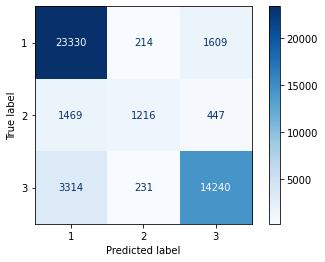

In [77]:
# Create and print a confusion matrix 
plot_confusion_matrix(classifier, X_train, y_train, cmap='Blues')

In [101]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

NameError: name 'StandardScaler' is not defined

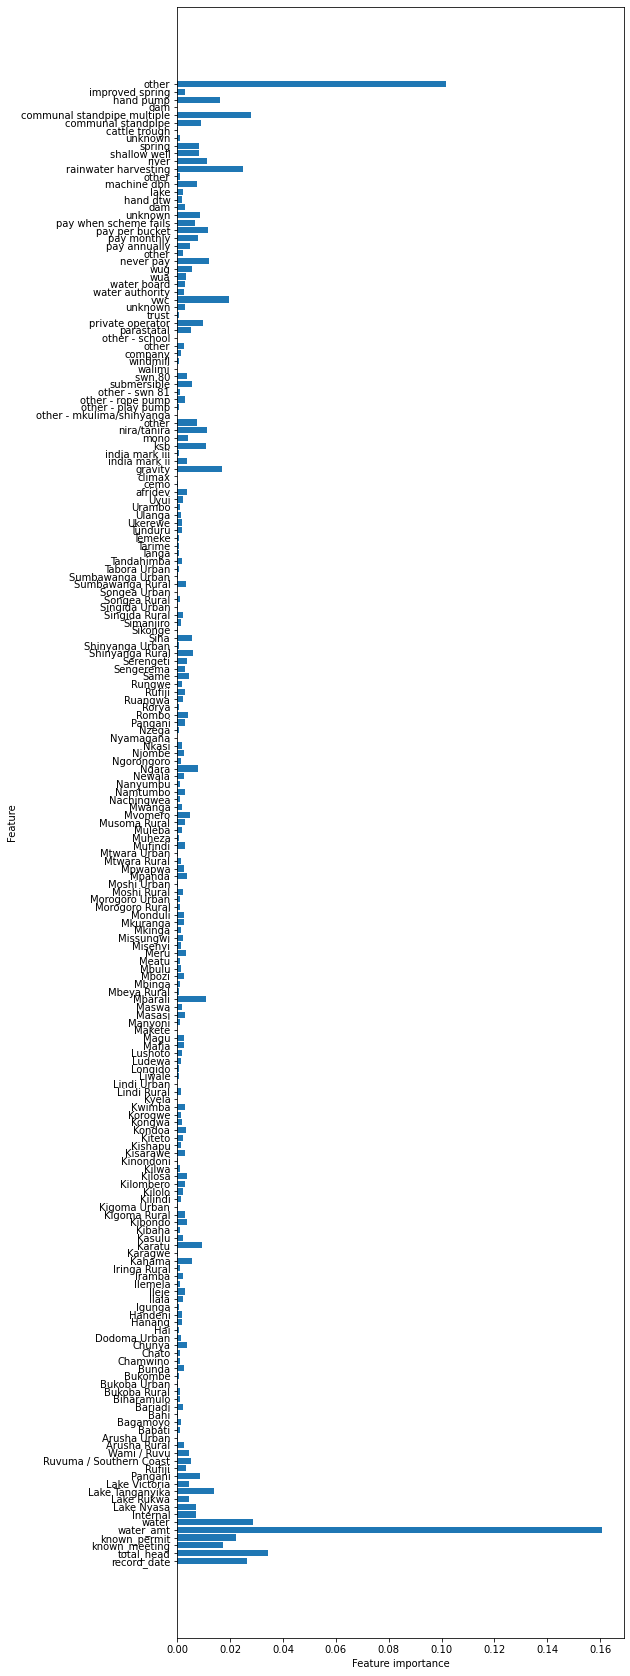

In [90]:
#print(classifier.feature_importances_)
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,30))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(classifier)

In [91]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5, oob_score=True, bootstrap=True)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, oob_score=True)

In [92]:
forest.score(X_train, y_train)

0.6807249837204254

In [93]:
forest.oob_score_

0.6785977859778598

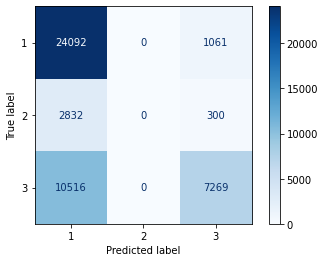

In [94]:
plot_confusion_matrix(forest, X_train, y_train, cmap='Blues')

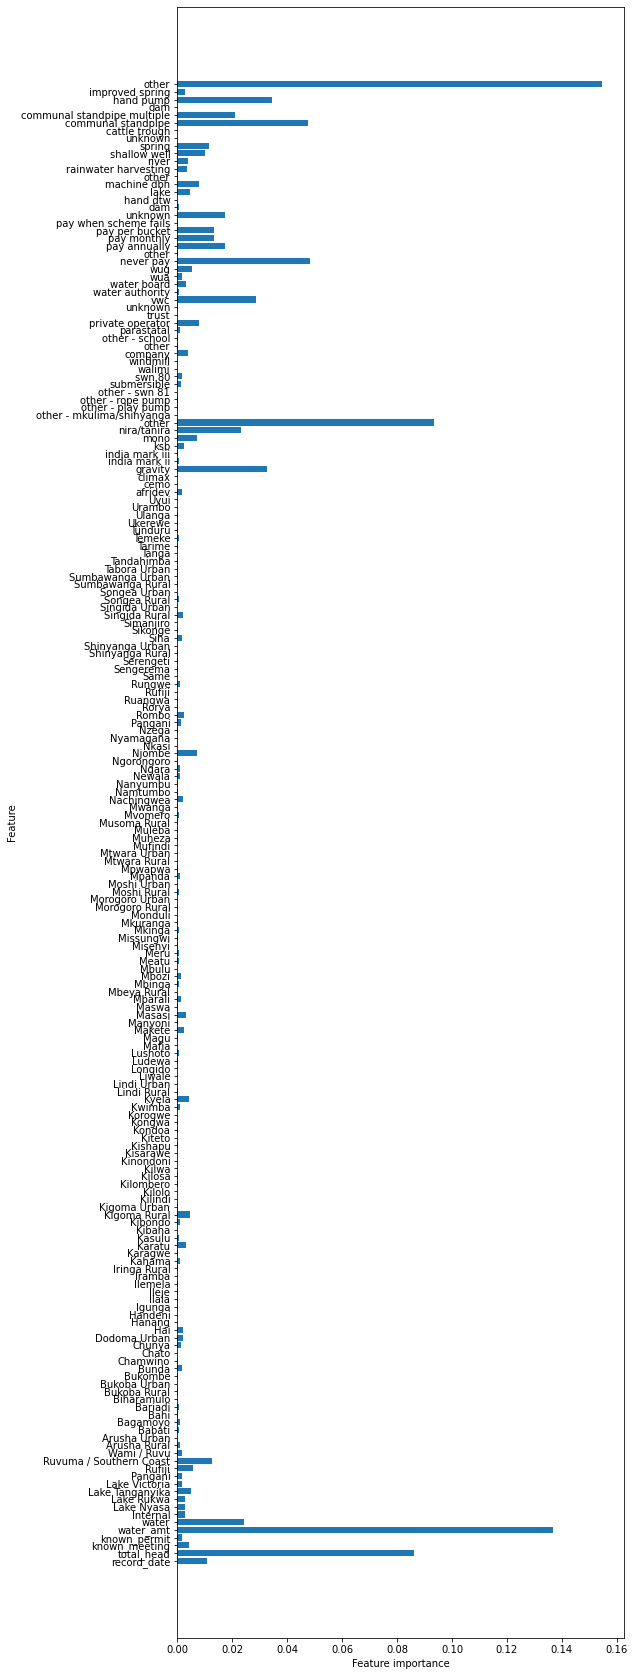

In [95]:
plot_feature_importances(forest)

In [102]:
forest = RandomForestClassifier(n_estimators=10, max_depth= 20, oob_score=True, bootstrap=True)
forest.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(max_depth=20, n_estimators=10, oob_score=True)

In [103]:
forest.score(X_train, y_train)

0.8073149555024962

In [104]:
forest.oob_score_

0.7520729324940308

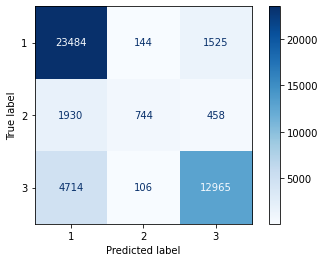

In [105]:
plot_confusion_matrix(forest, X_train, y_train, cmap='Blues')

In [107]:
#your code here

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [30, 100, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30],
}

In [ ]:
gs = GridSearchCV(forest, param_grid, cv=5)
gs.fit(X_train, y_train)
gs.score(X_train, y_train)
gs.best_params_

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [ ]:
best_randfor = gs.best_estimator_
best_randfor.score(X_train, y_train)

In [ ]:
best_randfor.oob_score_

In [ ]:
#y_pred = best_randfor.predict(X_train)
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_pred)
#roc_auc = auc(false_positive_rate, true_positive_rate)
#roc_auc

In [ ]:
plot_confusion_matrix(best_randfor, X_train, y_train, cmap='Blues')

## Regression

After acquiring and exploring your data (including cleaning it up), you'll then go on to model said data using the regression techniques you learned about earlier. With this, recall that there are four main assumptions underlying a linear regression model.

### 1. Linearity

With linear models, the target variable is being modeled as a linear combination of the independent variables. As such, there should be a linear relationship between the target variable and the various features being used. If the rate of change between the target variable and one of the features is non-linear and displays other characteristics such as an exponential acceleration, then prior transformations of the data are necessary before applying a regression model. 

### 2. Normality

With linear models, the errors (residuals) from the model are assumed to be normally distributed. A good heuristic to initially check for this is to use a Q-Q plot. 

### 3. Homoscedasticity

Along with the assumption of normal distribution, error terms should also not be correlated with the target variable or other features within the model. If errors indeed appear to be random and there are no discernible trends, then the errors are said to be homoscedastic. Looking at a simple plot of residuals against the target variable or other feature is generally sufficient to gauge this.

### 4. Independence

Finally, regression models assume that the various independent features feeding into the model are independent. You'll take a further look at this in this section and investigate how to check for multicollinearity. Multicollinearity is when a variable can be predicted with substantial accuracy by a separate set of features. Previously, you've examined multicollinearity in the context of the "dummy variable trap" and the two variable case. It's unwise to include two features in a regression model that are highly correlated. Similarly, in a multivariate case, having a set of features that can effectively predict another independent feature can be problematic. Such phenomenon will not reduce the overall accuracy of the model, but will **severely impede interpretation as coefficient weights of the model** become unstable so it is difficult or impossible to determine which features are most influential.